In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Data Generation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

directory_path = "/kaggle/input/iris-image-dataset"

imagegen = ImageDataGenerator()

data = imagegen.flow_from_directory(
    directory_path,
    target_size=(224, 224),   
    batch_size=32,            
    class_mode='categorical', 
    shuffle=True              
)

2024-04-01 17:50:01.323243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 17:50:01.323379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 17:50:01.458615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 421 images belonging to 3 classes.


In [3]:
data.class_indices

{'iris-setosa': 0, 'iris-versicolour': 1, 'iris-virginica': 2}

### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = []
y = []
for i in range(len(data)):
    batch_x, batch_y = data[i]
    X.extend(batch_x)
    y.extend(batch_y)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CNN Model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential([
        InputLayer(shape=(224, 224, 3)),

        Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='same'),

        Conv2D(55, (5, 5), activation='relu', strides=(2, 2), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='same'),

        Conv2D(75, (3, 3), activation='relu', strides=(2, 2), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='valid'),

        Flatten(),
        Dense(units=312, activation='relu'),
        Dense(units=84, activation='relu'),
        Dense(units=3, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 25)   │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 25)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 55)     │        34,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 55)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 75)     │        37,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 75)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3675)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 312)            │     1,146,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        26,292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,246,989 (4.76 MB)

 Trainable params: 1,246,989 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [7]:
# fit on data for 20 epochs
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5093 - loss: 32.6558

I0000 00:00:1711993823.237060      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711993823.256663      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5053 - loss: 27.7014

W0000 00:00:1711993832.052074      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 977ms/step - accuracy: 0.5046 - loss: 26.7625 - val_accuracy: 0.4941 - val_loss: 1.0931
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5464 - loss: 1.0096 - val_accuracy: 0.6000 - val_loss: 1.1972
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6487 - loss: 0.8580 - val_accuracy: 0.5882 - val_loss: 0.9684
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6614 - loss: 0.7713 - val_accuracy: 0.6000 - val_loss: 1.0156
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6989 - loss: 0.6848 - val_accuracy: 0.5882 - val_loss: 1.0537
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7847 - loss: 0.5872 - val_accuracy: 0.5176 - val_loss: 1.0249
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8237 - loss: 0.4616 - val_accuracy: 0.5882 - val_loss: 1.1593
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8574 - loss: 0.3594 - val_accuracy: 0.5059 - val_loss:

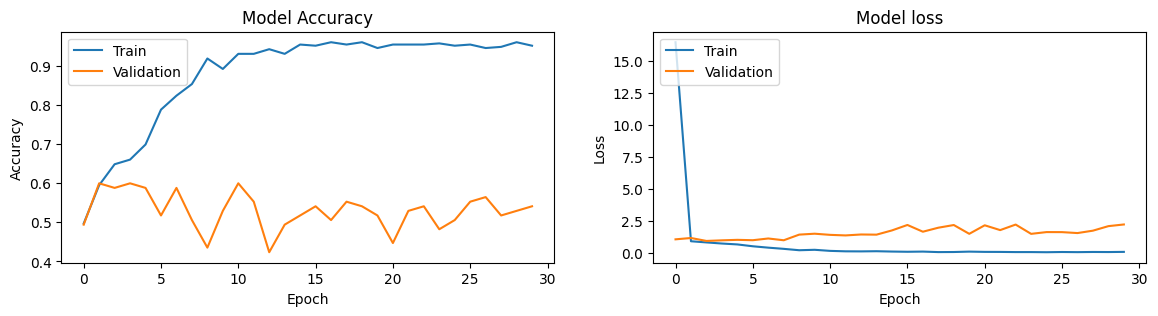

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 3))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Transfer Learning using VGG16 for classifying the Imagenette Dataset.

### Downloading the Weights of VGG16

In [9]:
from keras.applications import VGG16

In [10]:
# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
pretrained_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

- Generate Features from VGG16

In [11]:
from keras.utils import to_categorical
vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_test)

2024-04-01 17:50:47.678906: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-04-01 17:50:47.678966: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-04-01 17:50:47.678976: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-04-01 17:50:47.678984: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-04-01 17:50:47.678992: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-04-01 17:50:47.678999: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-04-01 17:50:47.679007: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-04-01 17:50:47.679016: E external/local_xla/xla/se

10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

2024-04-01 17:51:03.780046: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.89842, expected 3.37692
2024-04-01 17:51:03.780108: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13412, expected 2.61262
2024-04-01 17:51:03.780118: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.08377, expected 2.56227
2024-04-01 17:51:03.780126: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.1021, expected 3.5806
2024-04-01 17:51:03.780134: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.76539, expected 3.24388
2024-04-01 17:51:03.780142: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.19841, expected 3.6769
2024-04-01 17:51:03.780150: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.88366, expected 3.36216
2024-04-01 17:51:03.780158: E external/local_xla/xla

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 937ms/step
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

2024-04-01 17:51:13.010314: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.78283, expected 2.94933
2024-04-01 17:51:13.010383: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.74976, expected 4.91626
2024-04-01 17:51:13.010393: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.76648, expected 4.93298
2024-04-01 17:51:13.010401: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.49029, expected 4.65679
2024-04-01 17:51:13.010409: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.99986, expected 4.16636
2024-04-01 17:51:13.010417: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.68302, expected 4.84952
2024-04-01 17:51:13.010425: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.36663, expected 5.53313
2024-04-01 17:51:13.010432: E external/local_xla/xla/se

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step


In [12]:
# # OHE target column
# train_target = to_categorical(y_train)
# val_target = to_categorical(y_test)

### Classify the images using the features from VGG16

In [13]:
model_2 = Sequential([
    Flatten(input_shape=(7, 7, 512)),
    Dense(84, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(3, activation='softmax'),
])

model_2.compile(
    optimizer='adam', 
    metrics=['accuracy'], 
    loss='categorical_crossentropy'
)

model_2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │     2,107,476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,108,067 (8.04 MB)

 Trainable params: 2,107,899 (8.04 MB)

 Non-trainable params: 168 (672.00 B)

In [14]:
# train model using features generated from VGG16 model
history_2 = model_2.fit(vgg_features_train, y_train, epochs=30, batch_size=128, validation_data=(vgg_features_val, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3092 - loss: 1.6512 - val_accuracy: 0.6353 - val_loss: 18887.5742
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6280 - loss: 0.8785 - val_accuracy: 0.6353 - val_loss: 28631.2188
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7317 - loss: 0.6988 - val_accuracy: 0.6235 - val_loss: 25570.7363
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7541 - loss: 0.6003 - val_accuracy: 0.6235 - val_loss: 14189.1504
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8213 - loss: 0.5191 - val_accuracy: 0.6118 - val_loss: 12311.6152
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8499 - loss: 0.4988 - val_accuracy: 0.6118 - val_loss: 13050.7031
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8554 - loss: 0.4340 - val_accuracy: 0.5882 - val_loss: 11531.2188
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8643 - loss: 0.4047 - val_accuracy: 

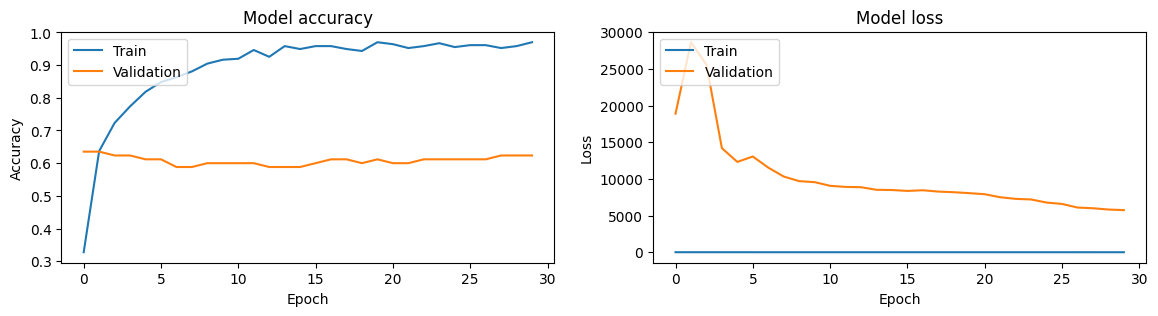

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()

___